In [1]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train_src, y_train_src), (x_test_src, y_test_src) = fashion_mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)


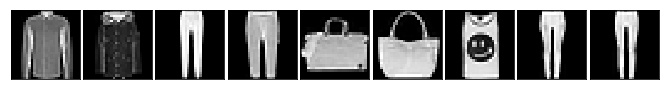

In [4]:
import numpy as np
# データセット確認
# データセットの大きさ確認
print(x_train_src.shape) # 訓練データのサイズ
print(x_test_src.shape) # テストデータのサイズ

# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

seed = np.random.randint(100)
for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train_src[i+seed], cmap='gray')

In [26]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train_src.reshape(-1, 28, 28, 1) / 255
x_test = x_test_src.reshape(-1, 28, 28, 1) /255
y_train = to_categorical(y_train_src)
y_test = to_categorical(y_test_src)

print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ
print(y_train.shape) 

# モデル構築
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

input_shape = (28, 28, 1)
# モデルを作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## 学習のためのモデルを設定
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [27]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=1, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 1.0008 - acc: 0.6504 - val_loss: 0.5354 - val_acc: 0.8036
Epoch 2/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.5494 - acc: 0.8020 - val_loss: 0.4407 - val_acc: 0.8383
Epoch 3/10
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.4653 - acc: 0.8318 - val_loss: 0.4227 - val_acc: 0.8375
Epoch 4/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.4145 - acc: 0.8520 - val_loss: 0.3661 - val_acc: 0.8671
Epoch 5/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.3817 - acc: 0.8638 - val_loss: 0.3347 - val_acc: 0.8788
Epoch 6/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.3585 - acc: 0.8723 - val_loss: 0.3285 - val_acc: 0.8806
Epoch 7/10
60000/60000 [==============================] - 117s

In [ ]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
This is ： バッグ


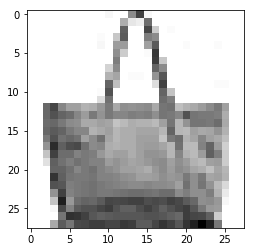

In [59]:
# 検証
import matplotlib.pyplot as plt
%matplotlib inline
# 学習済みモデル読み込み
from keras.models import load_model

from keras.datasets import mnist
import numpy as np

map = ("Tシャツ/トップス", "ズボン","プルオーバー","ドレス","コート","サンダル","シャツ","スニーカー", "バッグ", "アンクルブーツ")
# print(map[1])
# 確認
data = x_test_src[np.random.randint(10000)]
# print(data)
# print(data.reshape(1, 28, 28, 1)[0])
# print(data.reshape(1, 28, 28, 1).shape, data.reshape(1, 28, 28, 1).dtype)
predicated = model.predict(data.reshape(1, 28, 28, 1))
print(predicated)
# 検証
print("This is ：", map[np.argmax(predicated)])
# テスト画像データを表示
plt.imshow(data, cmap =plt.cm.gray_r)
plt.show()
